In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle


In [2]:
# #############################################################################
# Real benchmarked dataset
#data = pd.read_csv('../../RealData/RealData_nginx_small.csv')
data = pd.read_csv('../../RealData/RealData_nginx_big.csv')

#data = pd.read_csv('../../RealData/RealData_haproxy_small.csv')
#data = pd.read_csv('../../RealData/RealData_haproxy_big.csv')

#data = pd.read_csv('../../RealData/RealData_squid_small.csv')
#data = pd.read_csv('../../RealData/RealData_squid_big.csv')

## Log Syn. Data
#data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')



In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit regression model
svr_lin = SVR(kernel='poly', degree=2, C=10, gamma='scale')
svr_lin.fit(X_train, y_train)


SVR(C=10, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [5]:
prediction = svr_lin.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.1,0.230894
1,0.1,0.230882
2,0.1,0.230888
3,0.1,0.230881
4,0.1,0.230888
5,0.1,0.230887
6,0.1,0.230889
7,0.1,0.230884
8,0.1,0.230894
9,0.1,0.230885


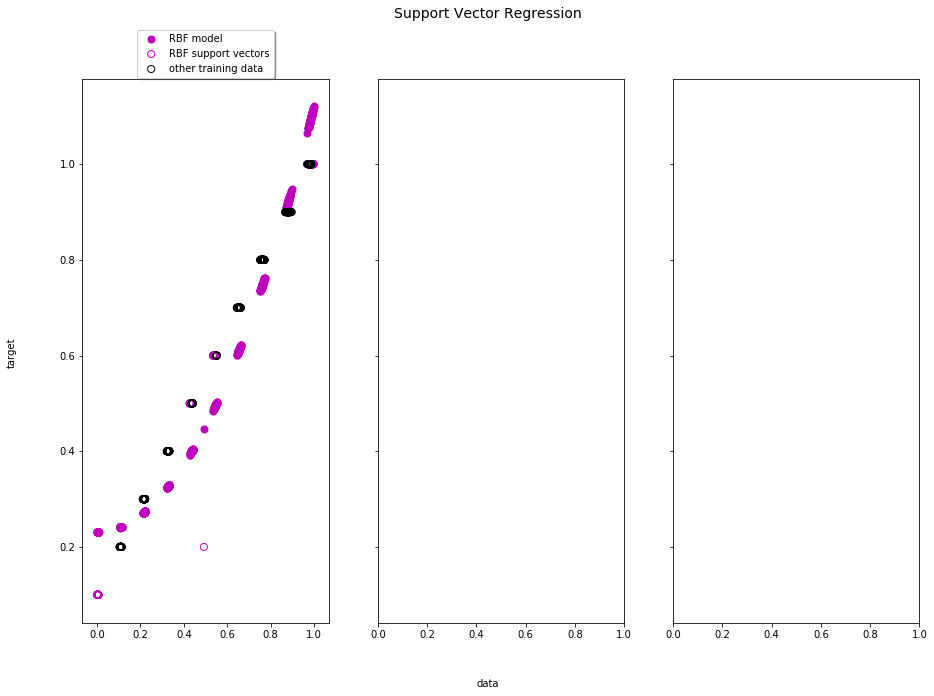

In [6]:
#Plot prediction
#plt.scatter(X_test, y_test,  color='gray')
#plt.plot(X_test, prediction, color='red', linewidth=2)
#plt.xlabel("Y test")
#plt.ylabel("Predicted Y")
lw = 2
svrs = [svr_lin]
kernel_label = ['RBF']
model_color = ['m']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].scatter(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()


In [7]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



MAE: 0.06910853610482175
MSE: 0.006041683406941163
RMSE: 0.07772826646041428


In [8]:
# save the model to disk
filename = '../models/SVM_nginx_big_model.sav'
pickle.dump(svr_lin, open(filename, 'wb'))

In [9]:
svr_lin.predict([[0.2243476]])

array([0.27581205])